In [14]:
# 알려진 평균
mu = 200
# 수집된 표본
data = [200,210,180,190,185,170,180,180,210,180,183,191,204,201,186]

# 데이터가 적어도 30개 이상이면 중심극한 정리를 적용할 수 있지만
# 여기서는 데이터 수가 15개 이기 때문에 별도의 정규성 검정이 필요

# 정규성 검정
from scipy.stats import shapiro
shapiro(data)

ShapiroResult(statistic=0.9217348098754883, pvalue=0.20472252368927002)

Text(0.5, 1.0, 'box plot')

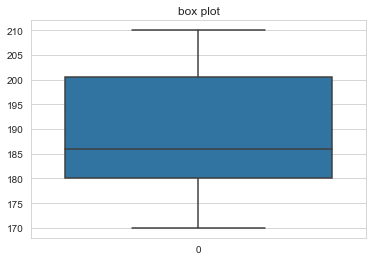

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

sns.boxplot(data=data)
plt.title('box plot')

In [23]:
#자유도 계산
df = len(data) - 1
print(df)

#평균과 신뢰구간
from numpy import array,mean
from scipy.stats import sem,t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h
mean_confidence_interval(data)

14


(190.0, 183.20468237313676, 196.79531762686324)

In [34]:
before = [7,3,4,5,2,1,6,6,5,4]
after = [8,4,5,6,2,3,6,8,6,5]
when = ['before', 'after']
when = [when[j] for j in range(2) for i in range(10)]
data = pd.DataFrame({'when':when, 'score':before+after})
data.head(3)

,when,score
0,before,7
1,before,3
2,before,4


In [33]:
import pandas as pd # ↑ 판다스를 불러와서 pd로 정의한다. (pd 쓰면 판다스가 되는것)

<AxesSubplot:xlabel='when', ylabel='score'>

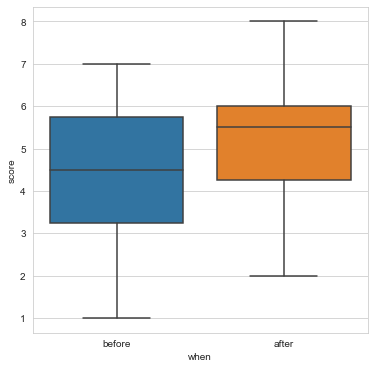

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(x='when', y='score', data=data)

In [36]:
#정규성 검정

from scipy.stats import shapiro
normal1 = shapiro(before)
normal2 = shapiro(after)
print(normal1, normal2)

#p-value 모두 0.05 보다 크기 때문에 정규성에 문제가 없음.

ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574) ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687)


In [38]:
# 등분산성 고려
from scipy.stats import levene

print(levene(before, after))
from scipy.stats import bartlett
print(bartlett(before, after))

#p-value 가 0.05 보다 커서 등분산성이 있다고 할 수 있다.

LeveneResult(statistic=0.0, pvalue=1.0)
BartlettResult(statistic=0.007785808167159078, pvalue=0.9296881301038368)


In [39]:
import scipy.stats

# 대응표본 t 검정 수행
scipy.stats.ttest_rel(before, after)

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

In [40]:
a = [-1,0,3,4,1,3,3,1,1,3]
b = [6,6,8,8,11,11,10,8,8,9]
group = ['a']*10 + ['b']*10
data = pd.DataFrame({'group':group, 'temp':a+b})
data.head(3)

,group,temp
0,a,-1
1,a,0
2,a,3


Text(0.5, 1.0, 'Box plot')

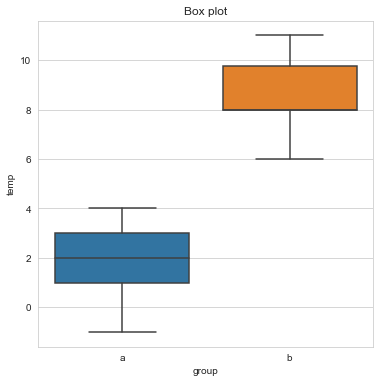

In [41]:
plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='temp', data=data)
plt.title('Box plot')

In [42]:
# 데이터가 10 개뿐이므로 shapiro-wilks 의 정규성을 검정해보자
normal1 = shapiro(a)
normal2 = shapiro(b)
print(normal1, normal2)

#결과는 모두 p-value 가 0.05 보다 커서 정규성을 만족한다.

ShapiroResult(statistic=0.900489330291748, pvalue=0.2218218445777893) ShapiroResult(statistic=0.9001172184944153, pvalue=0.21974670886993408)


In [43]:
#levene test 로 등분산성을 검정

from scipy.stats import levene, ttest_ind
print(levene(a,b))

#등분산성을 bartlett test 로 할 수도 있음 바틀렛
from scipy.stats import bartlett
print(bartlett(a,b))

#p-value 가 유의수준 0.05 보다 크기 때문에 귀무가설을 기각하지 않는다
#따라서 a,b 두 집단의 데이터는 등분산성을 만족한다고 볼 수 있음.

LeveneResult(statistic=0.04864864864864852, pvalue=0.8279140454175956)
BartlettResult(statistic=0.07575407415781324, pvalue=0.7831360213267907)


In [44]:
ttest_ind(a,b)
# 검정 통계량은 -8.806, p-value 는 6.085e-08 이다.
# p-value 가 0 에 가까운 매우 작은 숫자로
# 유의수준보다 작기 때문에 귀무가설을 기각한다. 
# 따라서 a,b 두 지역의 겨울 낮 최고기온에는 통계적으로 유의한 차이가 존재한다는 결론을 내릴수 있음

Ttest_indResult(statistic=-8.805969882200303, pvalue=6.085029390352169e-08)

In [45]:
#등분산성을 만족하지 못하는 2 개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가합니다.
ttest_ind(a,b, equal_var=False)

Ttest_indResult(statistic=-8.805969882200303, pvalue=6.53517433563811e-08)